### 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


Home Creditはどのような企業？
→信用履歴がない人々への金融事業を行う企業

このコンペティションでは何を予測する？
→信用履歴の代替データを使用して貸倒リスクを予測する。

それを予測することで企業が得られるメリットは何？
→貸倒件数の現状、貸し出し件数の増加。


### 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

.head()、.info()、describe()などを使う

欠損値の有無を見る

クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください。



In [238]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

df = pd.read_csv("application_train.csv")

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [240]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [241]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

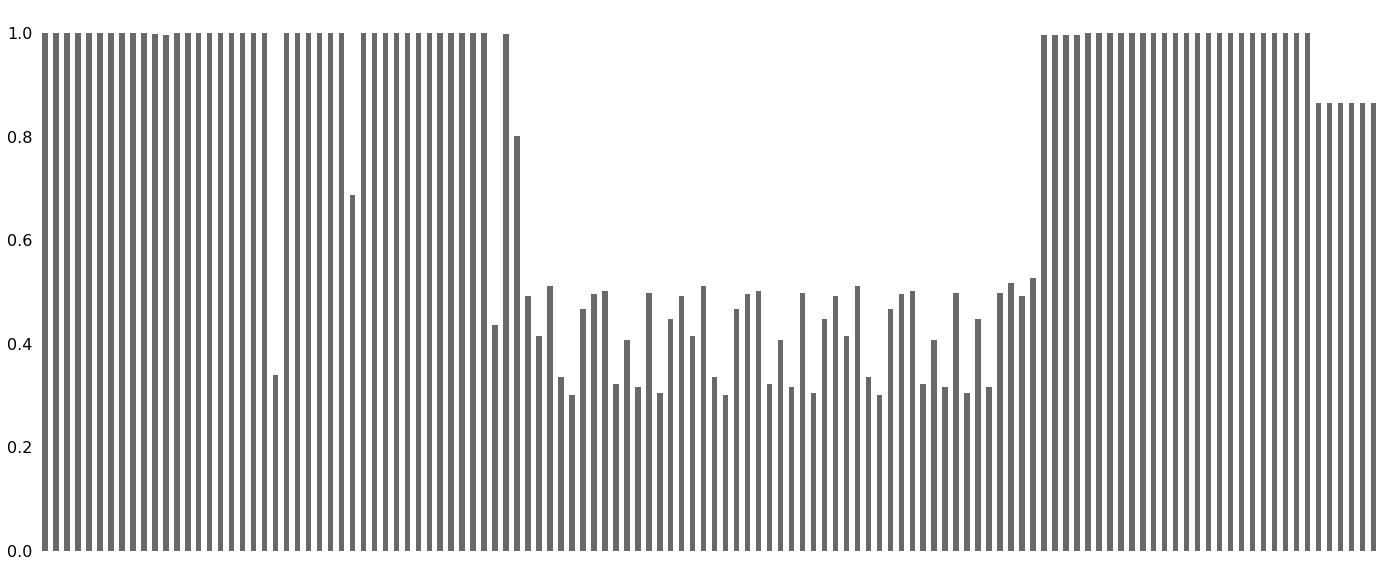

In [242]:
msno.bar(df)

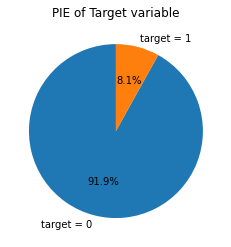

In [243]:
target_counts = df['TARGET'].value_counts()
#print(target_counts)
graph_labels = ["target = 0", "target = 1"]
plt.title('PIE of Target variable')
plt.pie(target_counts, labels=graph_labels, startangle=90, autopct="%1.1f%%")
plt.show()

全行にTARGET=0,1が記載されている。従って過去の返済結果のデータと考えられる。
欠損率が0.5以下となるデータが半数程度ある。

###  【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

・目的変数が０、１と非連続な値になっている。授業前課題と同手法(相関係数行列)で説明変数との相関が出せるのか？

　→理論的には出せない。従い個別の説明変数と目的変数の関係を図示して探ることにする。

・まずはTARGETとの相関係数が高い説明変数について、グラフ描画してTARGETとの関係性を探る。

　→理論的には相関係数の算出に意味はないが、実用としては相関係数の使用は
 　説明変数の選択に効率的と考え、相関係数を算出することにする。

・欠損率が高いデータが多いが削除すべきか。欠損率を代替値で埋めるべきか？

　→現状、削除も代替地も使用しないこととする。（今回の課題の大勢には影響しないと判断）

・相関係数が高い説明変数と、年収にかかる説明変数について目的変数との関係を探ることにする。

・個別の説明変数と目的変数との間に明確な関係性を持つものは現状、発見できていない。
 複数の説明変数から新たな説明変数を算出したりする必要があるかもしれない。
 

### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。

In [244]:
#TARGETとの相関係数の絶対値が高い上位10種の抽出
df_corr_abs = df.corr().abs()
df_sort = df_corr_abs.sort_values( "TARGET", ascending=False)
df_10 = df_sort[1:11]["TARGET"]
index_corr_abs_10 = df_10.index #上位10種の説明変数のリスト
print("TARGETとの相関関係の絶対値が大きい説明変数上位10種")
print(df_10)

TARGETとの相関関係の絶対値が大きい説明変数上位10種
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
Name: TARGET, dtype: float64


EXT_SOURCE_1〜3は比較的相関係数が大きいが、Normalized score from external data sourceとのことで、詳細は現状の資料では不明。

その他の係数について検討することにする。


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
df = pd.read_csv("application_train.csv")

### グラフ①

TARGET = 0,1について、収入のばらつきを比較

<function matplotlib.pyplot.show(*args, **kw)>

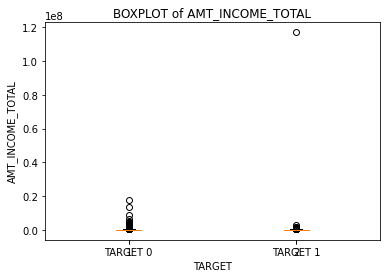

In [247]:
title = "AMT_INCOME_TOTAL"

y0 = df.query("TARGET == 0").loc[:,'AMT_INCOME_TOTAL']
y_t0 = np.array(y0)

y1 = df.query("TARGET == 1").loc[:,'AMT_INCOME_TOTAL']
y_t1 = np.array(y1)

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.boxplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("BOXPLOT of {}".format(title))
plt.show

### グラフ②

"グラフ①"について、外れ値（TARGET0の上位5要素、TARGET1の上位１要素）と思われる値を削除

大多数の要素が存在する領域を拡大して表示する。

<function matplotlib.pyplot.show(*args, **kw)>

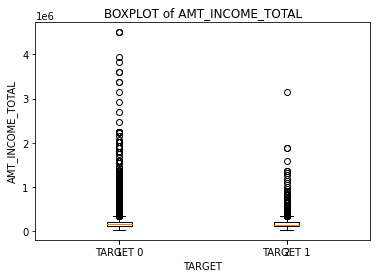

In [248]:
title = "AMT_INCOME_TOTAL"

y0 = df.query("TARGET == 0").loc[:,'AMT_INCOME_TOTAL']
y_t0 = np.array(y0)
for _ in range(5):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,'AMT_INCOME_TOTAL']
y_t1 = np.array(y1)
y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.boxplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("BOXPLOT of {}".format(title))
plt.show

TARGET 0, 1を比較してもボックス内(25%〜75%範囲）では、そこまで大きな差は見られない。

### グラフ③

"グラフ②"と同数値だがバイオリンプロットで描画する。

<function matplotlib.pyplot.show(*args, **kw)>

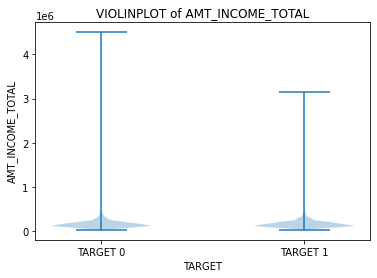

In [256]:
title = "AMT_INCOME_TOTAL"

y0 = df.query("TARGET == 0").loc[:,'AMT_INCOME_TOTAL']
y_t0 = np.array(y0)
for _ in range(5):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,'AMT_INCOME_TOTAL']
y_t1 = np.array(y1)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.violinplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("VIOLINPLOT of {}".format(title))
plt.show

箱ひげ図の場合と同様に、TARGET==0, 1で大きな差は無いように思われる。

### グラフ④
相関係数の大きい"DAYS_BIRTH"についてTARGET=0,1に分けて分布を確認する。

（グラフ上縦軸に年齢に変換して表示している。）

<function matplotlib.pyplot.show(*args, **kw)>

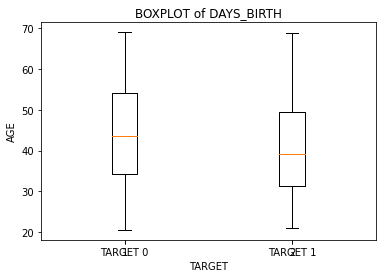

In [252]:
title = "DAYS_BIRTH"

y0 = df.query("TARGET == 0").loc[:,title]
y_t0 = np.array(y0) / (-365)
for _ in range(1):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,title]
y_t1 = np.array(y1) / (-365)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.boxplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel('AGE')
plt.title("BOXPLOT of {}".format(title))
plt.show

やはり　TARGET==1の方が年収が低い傾向がある。

### グラフ⑤

相関係数の大きい"DAYS_BIRTH"についてTARGET=0,1に分けてバイオリンプロットにて分布を確認する。

<function matplotlib.pyplot.show(*args, **kw)>

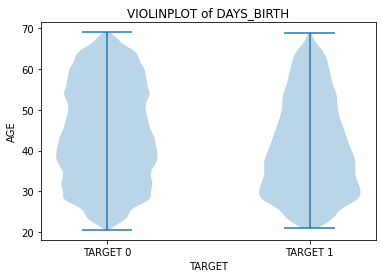

In [257]:
title = "DAYS_BIRTH"

y0 = df.query("TARGET == 0").loc[:,title]
y_t0 = np.array(y0) / (-365)
for _ in range(1):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,title]
y_t1 = np.array(y1) / (-365)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.violinplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel('AGE')
plt.title("VIOLINPLOT of {}".format(title))
plt.show

TARGET=1は若年層に分布が偏っていることがわかる。

### グラフ⑥
相関係数の大きい"REGION_RATING_CLIENT_W_CITY"について、TARGET=0, 1に分けて分布を確認する。

<function matplotlib.pyplot.show(*args, **kw)>

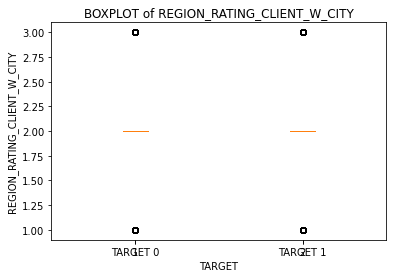

In [255]:
title = "REGION_RATING_CLIENT_W_CITY"

y0 = df.query("TARGET == 0").loc[:,title]
y_t0 = np.array(y0)
for _ in range(1):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,title]
y_t1 = np.array(y1)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.boxplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("BOXPLOT of {}".format(title))
plt.show

箱ひげ図では、説明変数が離散的な値の場合、図示しても意味がないことがわかった。

### グラフ⑦
相関係数の大きい"REGION_RATING_CLIENT_W_CITY"について、TARGET=0, 1に分けてバイオリンプロットにて分布を確認する。

<function matplotlib.pyplot.show(*args, **kw)>

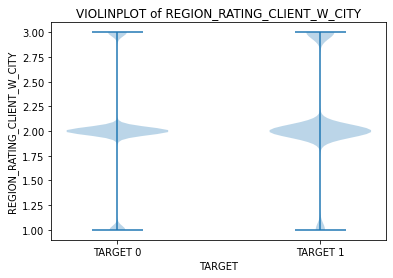

In [258]:
title = "REGION_RATING_CLIENT_W_CITY"

y0 = df.query("TARGET == 0").loc[:,title]
y_t0 = np.array(y0)
for _ in range(1):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,title]
y_t1 = np.array(y1)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.violinplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("VIOLINPLOT of {}".format(title))
plt.show

バイオリン図では、箱ひげ図よりも分布が目で見てわかる。
RATING=3ではデフフォルト確率が高いように見える。

### グラフ⑧
相関係数の大きい"DAYS_LAST_PHONE_CHANGE"について、TARGET=0, 1に分けて分布を確認する。

<function matplotlib.pyplot.show(*args, **kw)>

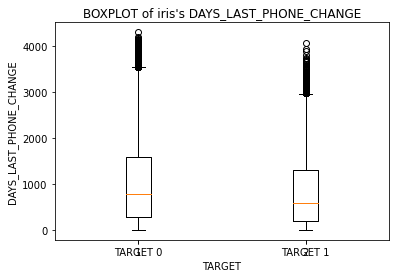

In [260]:
title = "DAYS_LAST_PHONE_CHANGE"

y0 = df.query("TARGET == 0").loc[:,title]
y_t0 = np.array(y0) * (-1)
for _ in range(1):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,title]
y_t1 = np.array(y1)* (-1)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.boxplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("BOXPLOT of {}".format(title))
plt.show

### グラフ⑨
相関係数の大きい"DAYS_LAST_PHONE_CHANGE"について、TARGET=0, 1に分けてバイオリンプロットにて分布を確認する。

<function matplotlib.pyplot.show(*args, **kw)>

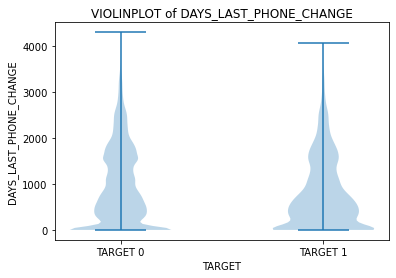

In [261]:
title = "DAYS_LAST_PHONE_CHANGE"

y0 = df.query("TARGET == 0").loc[:,title]
y_t0 = np.array(y0) * (-1)
for _ in range(1):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,title]
y_t1 = np.array(y1)* (-1)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.violinplot((y_t0, y_t1))
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("VIOLINPLOT of {}".format(title))
plt.show

携帯電話を変えた日が、過去1000日以内の場合は、デフォルト確率が高いように見える。

### グラフ⑩
相関係数の大きい"DAYS_ID_PUBLISH"について、TARGET=0, 1に分けて分布を確認する。

<function matplotlib.pyplot.show(*args, **kw)>

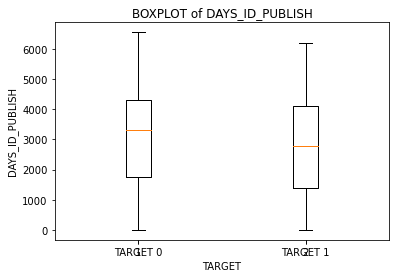

In [263]:
title = "DAYS_ID_PUBLISH"

y0 = df.query("TARGET == 0").loc[:,title]
y_t0 = np.array(y0) * (-1)
for _ in range(1):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,title]
y_t1 = np.array(y1)* (-1)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("BOXPLOT of {}".format(title))
plt.boxplot((y_t0, y_t1))
plt.show

### グラフ１１
相関係数の大きい"DAYS_ID_PUBLISH"について、TARGET=0, 1に分けてバイオリンプロットにて分布を確認する。

<function matplotlib.pyplot.show(*args, **kw)>

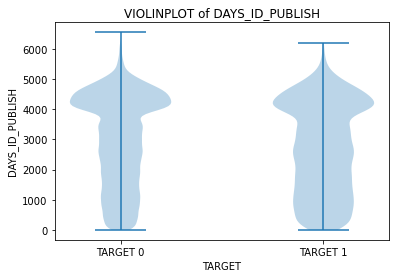

In [265]:
title = "DAYS_ID_PUBLISH"

y0 = df.query("TARGET == 0").loc[:,title]
y_t0 = np.array(y0) * (-1)
for _ in range(1):
    y_t0 = np.delete(y_t0, y_t0.argmax())

y1 = df.query("TARGET == 1").loc[:,title]
y_t1 = np.array(y1)* (-1)
for _ in range(1):
    y_t1 = np.delete(y_t1, y_t1.argmax())

fig = plt.figure(figsize=(6, 4), dpi=72)
plt.xticks([1, 2], ["TARGET 0","TARGET 1"])
plt.xlabel('TARGET')
plt.ylabel(title)
plt.title("VIOLINPLOT of {}".format(title))
plt.violinplot((y_t0, y_t1))
plt.show

4000日を超える場合は、デフォルト確率が低いように見える。

### グラフ12, 13

性別毎にTARGRT = 0,1の分布に違いを確認する。

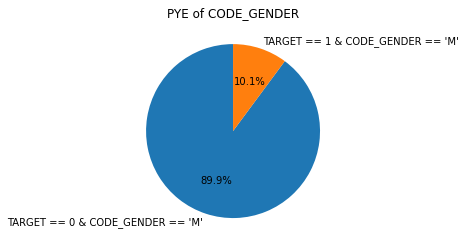

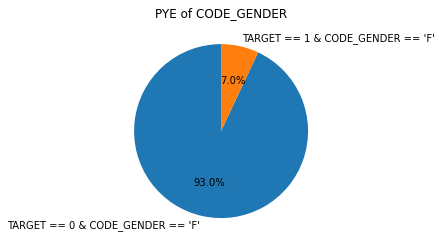

In [266]:
#df.query("CODE_GENDER == 'M' & TARGET == 1")

title = "CODE_GENDER"
df = pd.read_csv("application_train.csv")

y0 = df.query("TARGET == 0 & CODE_GENDER == 'M'").loc[:,title]
y_t0 = len(np.array(y0))

y1 = df.query("TARGET == 1 & CODE_GENDER == 'M'").loc[:,title]
y_t1 = len(np.array(y1))
    
y2 = df.query("TARGET == 0 & CODE_GENDER == 'F'").loc[:,title]
y_t2 = len(np.array(y2))

y3 = df.query("TARGET == 1 & CODE_GENDER == 'F'").loc[:,title]
y_t3 = len(np.array(y3))
    
plt.title("PYE of {}".format(title))
plt.pie((y_t0, y_t1), labels=["TARGET == 0 & CODE_GENDER == 'M'","TARGET == 1 & CODE_GENDER == 'M'"], startangle=90, autopct="%1.1f%%")
plt.show()

plt.title("PYE of {}".format(title))
plt.pie((y_t2, y_t3), labels=["TARGET == 0 & CODE_GENDER == 'F'","TARGET == 1 & CODE_GENDER == 'F'"], startangle=90, autopct="%1.1f%%")
plt.show()

男性と女性のデフォルトした割合を見ると、男性のデフォルト率の方が若干高くなっている。

### グラフ14, 15
相関係数の高い"REGION_RATING_CLIENT_W_CITY"毎にTARGRT = 0,1の分布に違いを確認する。

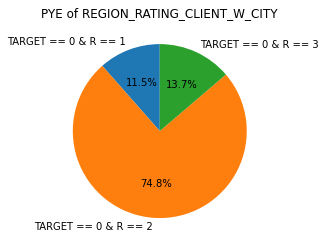

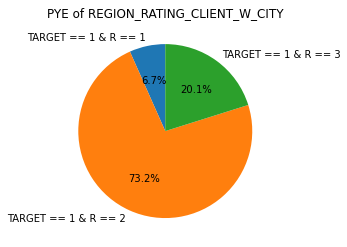

In [267]:
title = "REGION_RATING_CLIENT_W_CITY"
df = pd.read_csv("application_train.csv")

y0 = df.query("TARGET == 0 & REGION_RATING_CLIENT_W_CITY == '1'").loc[:,title]
y_t0 = len(np.array(y0))

y1 = df.query("TARGET == 1 & REGION_RATING_CLIENT_W_CITY == 1").loc[:,title]
y_t1 = len(np.array(y1))
    
y2 = df.query("TARGET == 0 & REGION_RATING_CLIENT_W_CITY == '2'").loc[:,title]
y_t2 = len(np.array(y2))

y3 = df.query("TARGET == 1 & REGION_RATING_CLIENT_W_CITY == 2").loc[:,title]
y_t3 = len(np.array(y3))

y4 = df.query("TARGET == 0 & REGION_RATING_CLIENT_W_CITY == '3'").loc[:,title]
y_t4 = len(np.array(y4))

y5 = df.query("TARGET == 1 & REGION_RATING_CLIENT_W_CITY == 3").loc[:,title]
y_t5 = len(np.array(y5))
    
plt.title("PYE of {}".format(title))
plt.pie((y_t0, y_t2, y_t4), labels=["TARGET == 0 & R == 1","TARGET == 0 & R == 2","TARGET == 0 & R == 3"], startangle=90, autopct="%1.1f%%")
plt.show()

plt.title("PYE of {}".format(title))
plt.pie((y_t1, y_t3, y_t5), labels=["TARGET == 1 & R == 1","TARGET == 1 & R == 2","TARGET == 1 & R == 3"], startangle=90, autopct="%1.1f%%")
plt.show()


"REGION_RATING_CLIENT_W_CITY"が1：比較的デフォルトしにくい

"REGION_RATING_CLIENT_W_CITY"が3：比較的デフォルトしやすいように見える。


### グラフ16
横軸：年齢、縦軸：直近の電話番号変更とした散布図。
２０代で電話番号を変更していない範囲では、TARGET==0となっている印象を受ける。

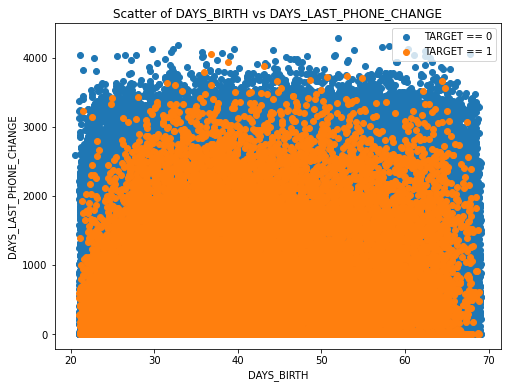

In [268]:
title1 = "DAYS_BIRTH"

x_0 = df.query("TARGET == 0").loc[:,title1]
x_0 = np.array(x_0) / (-365)
for _ in range(1):
    x_0 = np.delete(x_0, x_0.argmax())

x_1 = df.query("TARGET == 1").loc[:,title1]
x_1 = np.array(x_1) / (-365)
for _ in range(1):
    x_1 = np.delete(x_1, x_1.argmax())

title2 = "DAYS_LAST_PHONE_CHANGE"

y_0 = df.query("TARGET == 0").loc[:,title2]
y_0 = np.array(y_0) * (-1)
for _ in range(1):
    y_0 = np.delete(y_0, y_0.argmax())

y_1 = df.query("TARGET == 1").loc[:,title2]
y_1 = np.array(y_1)* (-1)
for _ in range(1):
    y_1 = np.delete(y_1, y_1.argmax())

    
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(x_0, y_0, label='TARGET == 0')
plt.scatter(x_1, y_1, label='TARGET == 1')
plt.xlabel("DAYS_BIRTH")
plt.ylabel("DAYS_LAST_PHONE_CHANGE")
plt.title("Scatter of DAYS_BIRTH vs DAYS_LAST_PHONE_CHANGE")
plt.legend()
plt.show()

### グラフ17
横軸：年齢、縦軸：収入とした散布図。
全年代に渡り年収が高いほどTARGET==0となる確率が高いように見える。

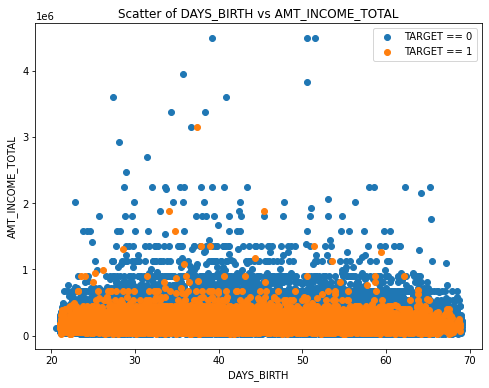

In [270]:
title1 = "DAYS_BIRTH"

x_0 = df.query("TARGET == 0").loc[:,title1]
x_0 = np.array(x_0) / (-365)
for _ in range(5):
    x_0 = np.delete(x_0, x_0.argmax())

x_1 = df.query("TARGET == 1").loc[:,title1]
x_1 = np.array(x_1) / (-365)
for _ in range(1):
    x_1 = np.delete(x_1, x_1.argmax())

title2 = "AMT_INCOME_TOTAL"

y_0 = df.query("TARGET == 0").loc[:,title2]
y_0 = np.array(y_0)
for _ in range(5):
    y_0 = np.delete(y_0, y_0.argmax())

y_1 = df.query("TARGET == 1").loc[:,title2]
y_1 = np.array(y_1)
for _ in range(1):
    y_1 = np.delete(y_1, y_1.argmax())

    
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(x_0, y_0, label='TARGET == 0')
plt.scatter(x_1, y_1, label='TARGET == 1')
plt.xlabel("DAYS_BIRTH")
plt.ylabel("AMT_INCOME_TOTAL")
plt.title("Scatter of DAYS_BIRTH vs AMT_INCOME_TOTAL")
plt.legend()
plt.show()

### グラフ18
横軸：クレジット総額、縦軸：収入とした散布図。
クレジット額が低く、収入も低い場合、デフォルト確率が高まるように見える。

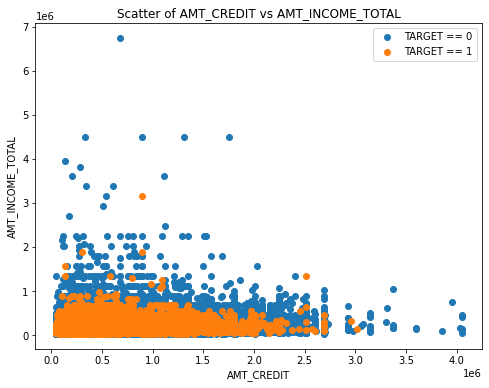

In [272]:
title1 = "AMT_CREDIT"

x_0 = df.query("TARGET == 0").loc[:,title1]
x_0 = np.array(x_0)
for _ in range(3):
    x_0 = np.delete(x_0, x_0.argmax())

x_1 = df.query("TARGET == 1").loc[:,title1]
x_1 = np.array(x_1)
for _ in range(1):
    x_1 = np.delete(x_1, x_1.argmax())

title2 = "AMT_INCOME_TOTAL"

y_0 = df.query("TARGET == 0").loc[:,title2]
y_0 = np.array(y_0)
for _ in range(3):
    y_0 = np.delete(y_0, y_0.argmax())

y_1 = df.query("TARGET == 1").loc[:,title2]
y_1 = np.array(y_1)
for _ in range(1):
    y_1 = np.delete(y_1, y_1.argmax())

    
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(x_0, y_0, label='TARGET == 0')
plt.scatter(x_1, y_1, label='TARGET == 1')
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_INCOME_TOTAL")
plt.title("Scatter of AMT_CREDIT vs AMT_INCOME_TOTAL")
plt.legend()
plt.show()